In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from access_biology_data import annotation
from access_biology_data import meta

from access_literature_data import medline

In [2]:
taxon_id = 9606 # Homo Sapiens
# taxon_id = 7227 # Drosophila melanogaster
# taxon_id = 10090 # Mus musculus

In [3]:
gene2pubmed = medline.gene2pubmed(taxon_id)
geneinfo = meta.gene_info(taxon_id)

# Define set of reference genes
f = (
    geneinfo.loc[:,'type_of_gene'] == 'protein-coding') & (
    geneinfo.loc[:,'Nomenclature_status'] =='O')
genes = geneinfo.loc[f,'gene_ncbi'].values

In [4]:
df_go = annotation.go(taxon_id,
        category=None,     # load any category ['Function', 'Process', 'Component']
        negating_support=[False],   # [True, False]     # whether given record is negating
        any_negating_support=[False],     # [True, False]     # whether at least one record for annotation is negating
        temporary_evidence=[False],     # [True, False]     # whether evidence is preliminary
        unmapped_evidence=[False])   # [True, False]     # whether GO lost information about source of evidence

In [5]:
df_rif = annotation.generif(taxon_id)

In [6]:
c_publications = gene2pubmed['gene_ncbi'].value_counts()
c_go = df_go['gene_ncbi'].value_counts()
c_rif = df_rif['gene_ncbi'].value_counts()

In [7]:
agg = pd.concat([c_publications, c_go, c_rif], axis=1, join='outer')
c = ['papers', 'go', 'rif']  # note: have to manually add order as above
agg.columns = c
agg.index.name = 'gene_ncbi'
agg = agg.loc[genes, :]
agg = agg.fillna(0)

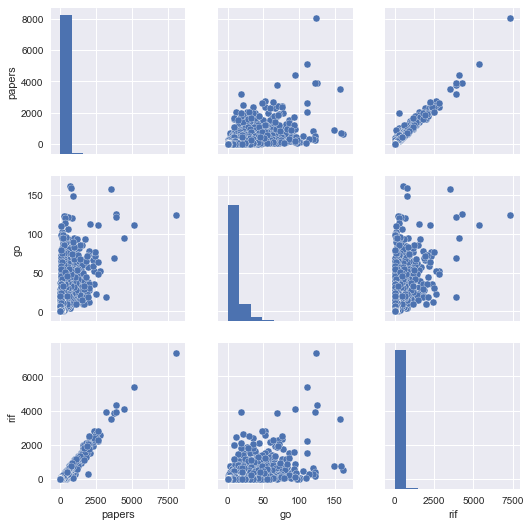

In [8]:
sns.pairplot(agg, x_vars=c, y_vars=c)

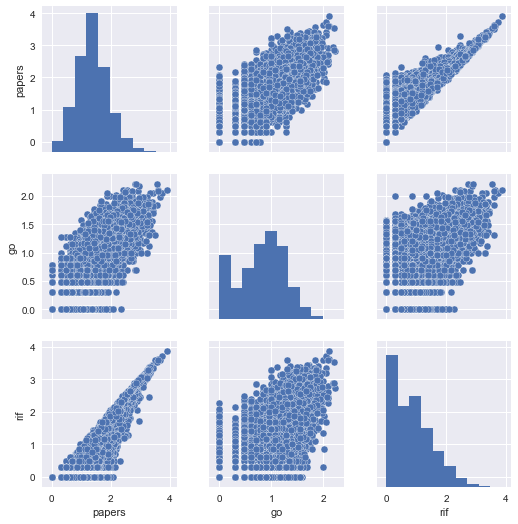

In [9]:
sns.pairplot(agg.apply(lambda x: np.log10(x + 1)), x_vars=c, y_vars=c)

In [10]:
corr = agg.corr('spearman')

In [11]:
corr

,papers,go,rif
papers,1.000000,0.745575,0.882893
go,0.745575,1.000000,0.665615
rif,0.882893,0.665615,1.000000
